## Data description for the file 'data.csv'

#### About the data
This data have the daily sales records of 5 products for two bakery stores. The data gathered represent the sales in a whole year. In addition to that, the prediction of the AI for each each day is included. 

#### Data fields

* **date**: The date of the sales record
* **item_id**: The item id of the product as used in the database
* **name**: The name of the product
* **unit_price**: The price of a single piece of the product in Euros.
* **waste**: The quantity in pieces of the product went to waste at the end of the day.
* **sales_qntty**: The quantity in pieces of what the store have sold during the day.
* **category**: To which category does this product belonges to
* **store_name**: The name of the bakery store
* **prediction**: The prediction by the AI of the expected quantity to be sold on a given day.

In [18]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=8bd743674fbaeff040211d88d5276d0f1b47c06a6dfdc51dffae33a96c625712
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\lenovo\anaconda3\envs\pythonProject1\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\lenovo\\AppData\\Local\\Temp\\pip-install-oggpy4rg\\sklearn_eb7fd7f1108241b0bd3d17e737899753\\setup.py'"'"'; __file__='"'"'C:\\Users\\lenovo\\AppData\\Local\\Temp\\pip-install-oggpy4rg\\sklearn_eb7fd7f1108241b0bd3d17e737899753\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\lenovo\AppData\Local\Temp\pip-pip-egg-info-xv8olrwi'
         cwd: C:\Users\lenovo\AppData\Local\Temp\pip-install-oggpy4rg\sklearn_eb7fd7f1108241b0bd3d17e737899753\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rat

In [19]:
# load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# load the data and convert the date column into date data type
df = pd.read_csv('data.csv')
df.head()

,date,item_id,name,unit_price,waste,sales_qntty,category,store_name,prediction
0,2020-06-02,102,Schnittbrötchen,0.36,19.0,383.0,Ebbis und Schnittbrötchen,one,370.687347
1,2020-06-03,102,Schnittbrötchen,0.36,0.0,360.0,Ebbis und Schnittbrötchen,one,331.705994
2,2020-06-04,102,Schnittbrötchen,0.36,53.0,353.0,Ebbis und Schnittbrötchen,one,350.590912
3,2020-06-02,121,Mehrkornbrötchen,0.70,41.0,120.0,Gemischte Brötchen,one,84.045364
4,2020-06-03,121,Mehrkornbrötchen,0.70,0.0,92.0,Gemischte Brötchen,one,80.833221


In [5]:
#Converting date column to date data type
df['date'] = pd.to_datetime(df['date'])
#df['date'] = pd.to_datetime(df['date']).dt.date # This can be done if the timestampp is not required
df.dtypes

date           datetime64[ns]
item_id                 int64
name                   object
unit_price            float64
waste                 float64
sales_qntty           float64
category               object
store_name             object
prediction            float64
dtype: object

In [6]:
# 1. what are the start and end dates of the data?
start_date = df['date'].min()
end_date = df['date'].max()
start_date, end_date

(Timestamp('2020-06-02 00:00:00'), Timestamp('2021-05-31 00:00:00'))

In [7]:
# 2. show a summary table of the sales and wastes of each store. The summary of 
# each store should show the total waste and sales in euros for the whole year
summary_table = df.groupby('store_name').agg(
    total_waste_euros=('waste', 'sum'),
    total_sales_euros=('sales_qntty', lambda x: (x * df.loc[x.index, 'unit_price']).sum())
).reset_index()

summary_table

,store_name,total_waste_euros,total_sales_euros
0,one,36808.0,150362.8996
1,two,48880.0,141952.9600


In [8]:
# 3. show the day with most sales of Schnittbrötchen (item_id = 102)
schnittbrochen_sales = df[df['item_id'] == 102]

most_sale= schnittbrochen_sales.loc[schnittbrochen_sales['sales_qntty'].idxmax()]

most_sale

date                 2020-08-08 00:00:00
item_id                              102
name                     Schnittbrötchen
unit_price                          0.36
waste                               12.0
sales_qntty                        914.0
category       Ebbis und Schnittbrötchen
store_name                           one
prediction                    666.684998
Name: 285, dtype: object

In [9]:
# 4. show the record with the worst prediction in Euros

#computing total for predicted sales and actual for each day
df['prediction_sales'] = df['prediction'] *  df['unit_price']
df['actual_sales'] = abs(df['sales_qntty'] * df['unit_price'])

#Difference in the actual and prediction sales in euros
df['prediction_difference'] = df['prediction_sales'] - df['actual_sales']

#Selecting the maximum difference
worst_prediction = df.loc[df['prediction_difference'].idxmax()]

worst_prediction


date                           2021-02-07 00:00:00
item_id                                        102
name                               Schnittbrötchen
unit_price                                    0.36
waste                                        559.0
sales_qntty                                  273.0
category                 Ebbis und Schnittbrötchen
store_name                                     two
prediction                              540.256714
prediction_sales                        194.492417
actual_sales                                 98.28
prediction_difference                    96.212417
Name: 2697, dtype: object

In [10]:
# 5. do the stores sell more products in winter or summer?

# Extracting months data 
df['month'] = pd.DatetimeIndex(df['date']).month

#computing total sales in euros for each day
df['sales_euros'] = df['unit_price'] * df['sales_qntty']


# Defining summer and winter month(my assumptions june july august as summer, Dec,Jan,Feb as Winter)
summer = [6, 7, 8]
winter = [12, 1, 2]

# Filtering data for summer and winter
summer_sales = df[df['month'].isin(summer)]
winter_sales = df[df['month'].isin(winter)]

# Calculating total sales in euros for summer and winter
total_summer_sales = summer_sales['sales_euros'].sum()
total_winter_sales = winter_sales['sales_euros'].sum()

total_summer_sales, total_winter_sales


(70446.26000000001, 72814.7)

In [11]:
# 6. show a plot (line plot) of the sales and predictions in quantity for the 
# period between 11.1.2021 and 17.1.2021 for the product Mehrkornbrötchen 
# (item_id = 121) within the second store.

# Filtering the data based on the conditions
filtered_data = df[(df['item_id'] == 121) & 
                     (df['store_name'] != 'one') &  
                     (df['date'] >= '2021-01-11') & 
                     (df['date'] <= '2021-01-17')]
filtered_data


,date,item_id,name,unit_price,waste,sales_qntty,category,store_name,prediction,prediction_sales,actual_sales,prediction_difference,month,sales_euros
2581,2021-01-11,121,Mehrkornbrötchen,0.7,17.0,63.0,Gemischte Brötchen,two,60.888062,42.621643,44.1,-1.478357,1,44.1
2582,2021-01-12,121,Mehrkornbrötchen,0.7,0.0,63.0,Gemischte Brötchen,two,52.912651,37.038856,44.1,-7.061144,1,44.1
2583,2021-01-13,121,Mehrkornbrötchen,0.7,32.0,48.0,Gemischte Brötchen,two,50.448776,35.314143,33.6,1.714143,1,33.6
2584,2021-01-14,121,Mehrkornbrötchen,0.7,3.0,63.0,Gemischte Brötchen,two,64.964706,45.475294,44.1,1.375294,1,44.1
2601,2021-01-15,121,Mehrkornbrötchen,0.7,0.0,79.0,Gemischte Brötchen,two,77.949509,54.564656,55.3,-0.735344,1,55.3
2602,2021-01-16,121,Mehrkornbrötchen,0.7,0.0,112.0,Gemischte Brötchen,two,109.057182,76.340028,78.4,-2.059972,1,78.4
2603,2021-01-17,121,Mehrkornbrötchen,0.7,24.0,75.0,Gemischte Brötchen,two,84.525558,59.167891,52.5,6.667891,1,52.5


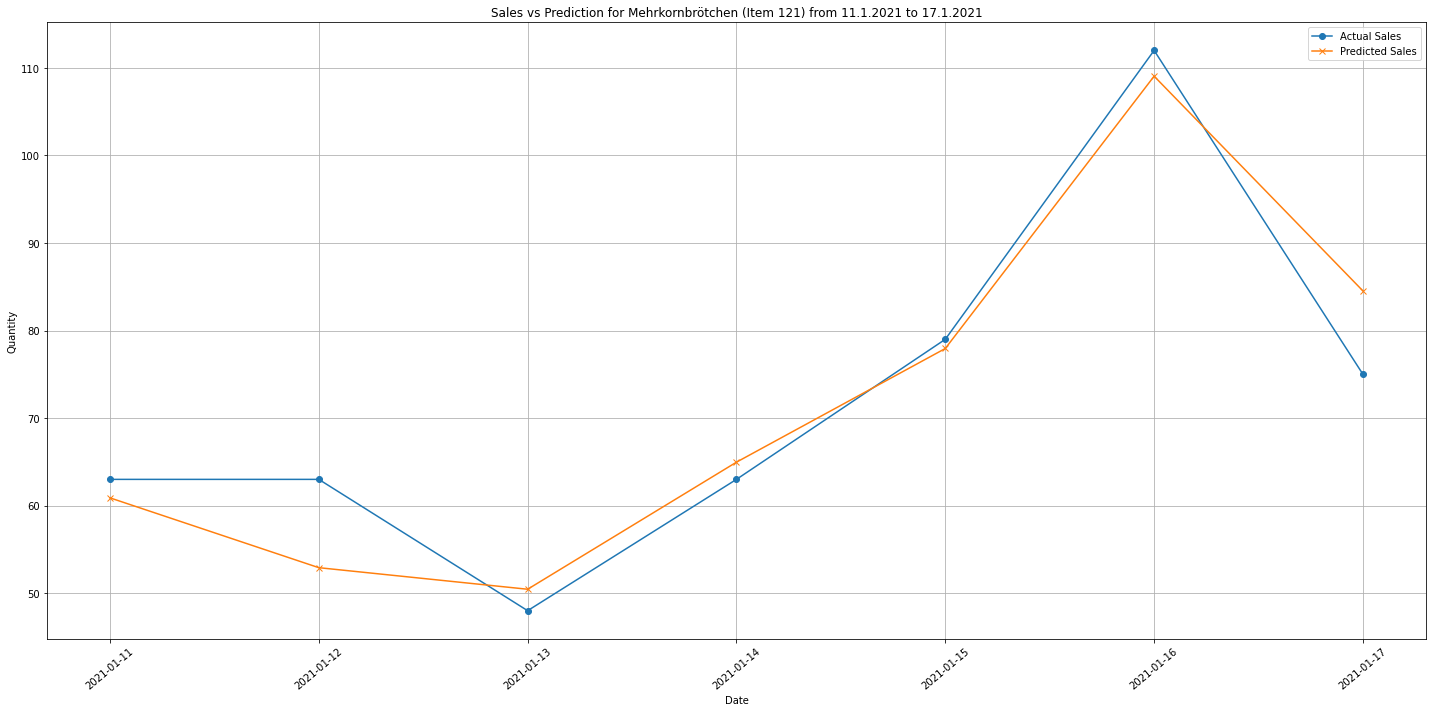

In [13]:
#Plotting the filtered data
plt.figure(figsize=(20, 10))
plt.plot(filtered_data['date'], filtered_data['sales_qntty'], label='Actual Sales', marker='o')
plt.plot(filtered_data['date'], filtered_data['prediction'], label='Predicted Sales', marker='x')
plt.title('Sales vs Prediction for Mehrkornbrötchen (Item 121) from 11.1.2021 to 17.1.2021')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=40)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# 7. on which days of the week is each store open?

# Adding a new column for the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Grouping by store name and day of the week to see the days on which each store has recorded sales(Assuming that no sales record means the store is closed)
store_open_days = df.groupby('store_name')['day_of_week'].unique().reset_index()
store_open_days

,store_name,day_of_week
0,one,"[Tuesday, Wednesday, Thursday, Friday, Saturda..."
1,two,"[Tuesday, Wednesday, Thursday, Friday, Saturda..."


In [16]:
# 8. if the second store used the AI predictions, how much would they have 
# saved/lost in Euros? Suppose the product cost is half its price.

#First computing difference between actual and predicted sales for second store
store_two = df[df['store_name'] == 'two']

# Calculating the difference between predicted and actual sales
store_two['sales_difference'] = store_two['prediction'] - store_two['sales_qntty']

# Calculatig the loss or saving in Euros (with half the unit price as the product cost)
store_two['cost_difference'] = store_two['sales_difference'] * (store_two['unit_price'] / 2)

# Total savings or losses
total_cost_difference = store_two['cost_difference'].sum()
total_cost_difference



C:\Users\lenovo\AppData\Local\Temp/ipykernel_12980/567823940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_two['sales_difference'] = store_two['prediction'] - store_two['sales_qntty']
C:\Users\lenovo\AppData\Local\Temp/ipykernel_12980/567823940.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_two['cost_difference'] = store_two['sales_difference'] * (store_two['unit_price'] / 2)


2051.960368214737

In [22]:
# 9. create a linear model for the sales of Schnittbrötchen (item_id = 102) at store two.
# use the data from 6.2020 ~ 3.2021 for training. Don't use external data like public holidays, etc.

#Filtering data for 'Schnittbrötchen' as suggested
filtered_data = df[(df['item_id'] == 102) & 
                     (df['store_name'] == 'two') & 
                     (df['date'] >= '2020-06-01') & 
                     (df['date'] <= '2021-03-31')]

filtered_data.head()

,date,item_id,name,unit_price,waste,sales_qntty,category,store_name,prediction,prediction_sales,actual_sales,prediction_difference,month,sales_euros,day_of_week
1510,2020-06-02,102,Schnittbrötchen,0.36,73.0,399.0,Ebbis und Schnittbrötchen,two,398.327942,143.398059,143.64,-0.241941,6,143.64,Tuesday
1511,2020-06-03,102,Schnittbrötchen,0.36,137.0,255.0,Ebbis und Schnittbrötchen,two,287.252716,103.410978,91.80,11.610978,6,91.80,Wednesday
1512,2020-06-04,102,Schnittbrötchen,0.36,125.0,277.0,Ebbis und Schnittbrötchen,two,303.647797,109.313207,99.72,9.593207,6,99.72,Thursday
1525,2020-06-05,102,Schnittbrötchen,0.36,85.0,377.0,Ebbis und Schnittbrötchen,two,427.577118,153.927762,135.72,18.207762,6,135.72,Friday
1526,2020-06-06,102,Schnittbrötchen,0.36,46.0,675.0,Ebbis und Schnittbrötchen,two,771.283813,277.662173,243.00,34.662173,6,243.00,Saturday


In [23]:
# Preparing the day of the week as a feature
filtered_data['day_of_week'] = filtered_data['date'].dt.dayofweek  # Monday=0, Sunday=6

# One-hot encoding the day of the week and  dropping the first category to avoid multicollinearity
X = pd.get_dummies(filtered_data['day_of_week'], drop_first=True)
y = filtered_data['sales_qntty']

C:\Users\lenovo\AppData\Local\Temp/ipykernel_12980/1473373782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['day_of_week'] = filtered_data['date'].dt.dayofweek  # Monday=0, Sunday=6


In [25]:
#Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

#Fitting the linear model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predicting on the training set
y_pred_train = model.predict(X_train)

# Calculating and print the MSE and R^2
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
print("Training MSE:", train_mse)
print("Training R^2:", train_r2)

Training MSE: 4767.665656315708
Training R^2: 0.8089043400084129


In [27]:
# 10. compute the L2 error of the model on data from 4.2021 ~ 5.2021

# Filtering the data for the evaluation period April 2021 to May 2021
evaluation_data = df[(df['item_id'] == 102) & 
                       (df['store_name'] == 'two') & 
                       (df['date'] >= '2021-04-01') & 
                       (df['date'] <= '2021-05-31')]

# Preparing the features
evaluation_data['day_of_week'] = evaluation_data['date'].dt.dayofweek
X_evaluation = pd.get_dummies(evaluation_data['day_of_week'], drop_first=True)
y_evaluation = evaluation_data['sales_qntty']

# Predict using the previously trained model
y_pred_evaluation = model.predict(X_evaluation)

# Compute the MSE for the predictions
evaluation_mse = mean_squared_error(y_evaluation, y_pred_evaluation)
evaluation_mse

C:\Users\lenovo\AppData\Local\Temp/ipykernel_12980/3356017472.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evaluation_data['day_of_week'] = evaluation_data['date'].dt.dayofweek


8425.722717595361